In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)


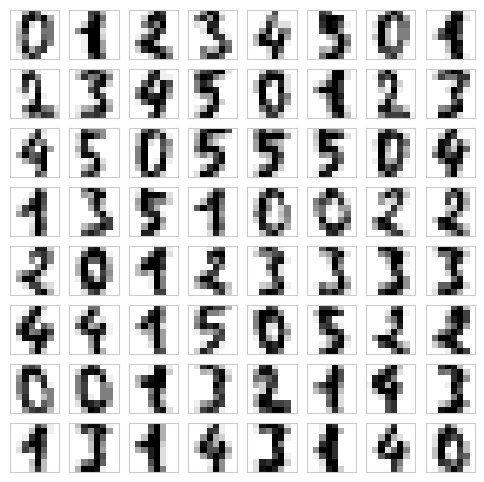

In [8]:
fig, axs = plt.subplots(8, 8, figsize=(6,6))
for idx, ax in enumerate(axs.flat):
    ax.imshow(digits.images[idx], cmap="binary")
    ax.set(xticks=[], yticks=[])


Projection to 2D data

In [10]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/Users/erfanbayat/Desktop/code_repos/venv/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/erfanbayat/Desktop/code_repos/venv/lib/python3.11/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/var/folders/kw/36zx74vs4rdc61z3sl65cnym0000gn/T/ipykernel_9814/4291927970.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('gist_rainbow', 6))


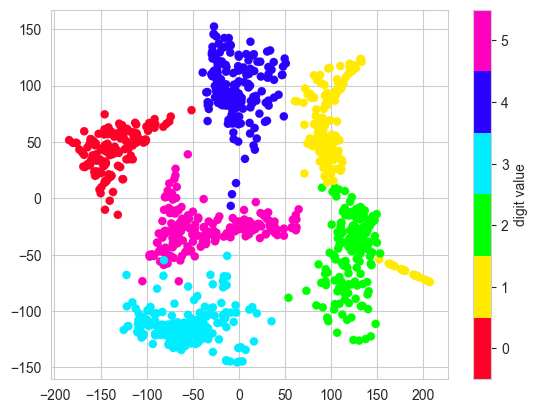

In [21]:
plt.scatter(projection[:, 0], projection[:, 1],
            lw=0.1, 
            c=digits.target,
            cmap=plt.cm.get_cmap('gist_rainbow', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

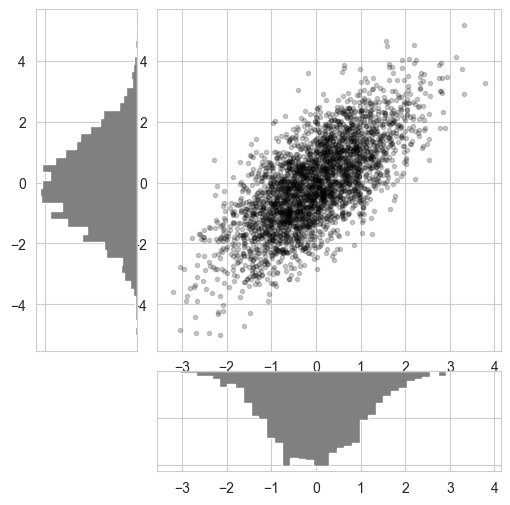

In [23]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
orientation='horizontal', color='gray')
y_hist.invert_xaxis()